In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Прочитанные данные
cars_data = pd.read_csv('cars_dataset.csv')

In [3]:
type(cars_data)

pandas.core.frame.DataFrame

In [4]:
#Информация по исходным данным
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31304 entries, 0 to 31303
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CarName                  31304 non-null  object 
 1   EngineType               31088 non-null  object 
 2   EngineAlignment          31303 non-null  object 
 3   FuelType                 31287 non-null  object 
 4   NumberOfValves           31304 non-null  object 
 5   EngineSize               31304 non-null  object 
 6   CompressionRatio         31301 non-null  object 
 7   MaximumPower             31296 non-null  float64
 8   MaximumTorque            31268 non-null  object 
 9   Drivetrain               31300 non-null  object 
 10  TransmissionGearbox      30883 non-null  float64
 11  FuelConsumption          31276 non-null  float64
 12  Range                    31304 non-null  int64  
 13  FuelTankCapacity         31304 non-null  float64
 14  CO2Emissions          

In [5]:
#Удаление столбцов, которые не будут использованы в работе
columns_to_drop = ['Length', 'Width', 'Height', 'CurbWeight', 'BootCapacity', 'Wheelbase', 'NumberOfDoors', 'NumberOfValves', 'TransmissionGearbox', 'EngineAlignment', 'EngineSize', 'CompressionRatio', 'Weight-PowerOutputRatio']
cars_data.drop(columns=columns_to_drop, inplace=True)

In [6]:
#Информация по данным, которые будут использоваться в работе
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31304 entries, 0 to 31303
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           31304 non-null  object 
 1   EngineType        31088 non-null  object 
 2   FuelType          31287 non-null  object 
 3   MaximumPower      31296 non-null  float64
 4   MaximumTorque     31268 non-null  object 
 5   Drivetrain        31300 non-null  object 
 6   FuelConsumption   31276 non-null  float64
 7   Range             31304 non-null  int64  
 8   FuelTankCapacity  31304 non-null  float64
 9   CO2Emissions      31287 non-null  object 
 10  TopSpeed          31304 non-null  object 
 11  Acceleration      31304 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.9+ MB


In [7]:
cars_data.isnull().sum()

CarName               0
EngineType          216
FuelType             17
MaximumPower          8
MaximumTorque        36
Drivetrain            4
FuelConsumption      28
Range                 0
FuelTankCapacity      0
CO2Emissions         17
TopSpeed              0
Acceleration          0
dtype: int64

In [8]:
cars_data.duplicated().sum()

1113

In [9]:
# Удаление строк c незаполненными данными
cars_data.dropna(inplace = True)
# Удаление дубликатов
cars_data.drop_duplicates(inplace=True)
# Удаление строк c неизвестными данными
cars_data = cars_data[~cars_data['TopSpeed'].str.contains('\?')]
cars_data = cars_data[~cars_data['Acceleration'].str.contains('\?')]
# Приведение данных в удобные для использования типы (object -> string exc.)
cars_data = cars_data.convert_dtypes(infer_objects=False)
# Нормализация столбца крутящего момента и приведение его к типу int64
cars_data['MaximumTorque'] = cars_data['MaximumTorque'].str.replace('[^0-9]', '', regex=True)
cars_data['MaximumTorque'] = pd.to_numeric(cars_data['MaximumTorque'], errors='coerce').astype('Int64')
# Нормализация столбца максимальной скорости и приведение его к типу int64
cars_data['TopSpeed'] = cars_data['TopSpeed'].str.replace('[^0-9]', '', regex=True)
cars_data['TopSpeed'] = pd.to_numeric(cars_data['TopSpeed'], errors='coerce').astype('Int64')
# Нормализация столбца ускорения 0-100 и приведение его к типу float64
cars_data['Acceleration'] = cars_data['Acceleration'].str.replace('[^0-9.]', '', regex=True)
cars_data['Acceleration'] = pd.to_numeric(cars_data['Acceleration'], errors='coerce').astype('Float64')
# Нормализация столбца выбросов углекислого газа и приведение его к типу int64
cars_data['CO2Emissions'] = cars_data['CO2Emissions'].str.replace('[^0-9]', '', regex=True)
cars_data['CO2Emissions'] = pd.to_numeric(cars_data['CO2Emissions'], errors='coerce').astype('Int64')
# Нормализация индексации строк после удаления лишнего
cars_data.reset_index(drop=True, inplace=True)
cars_data

,CarName,EngineType,FuelType,MaximumPower,MaximumTorque,Drivetrain,FuelConsumption,Range,FuelTankCapacity,CO2Emissions,TopSpeed,Acceleration
0,Peugeot 207 1.6 HDi 90,Inline 4,Diesel,90,215,FWD,4.5,1111,50.0,120,182,11.5
1,Seat Ibiza 6L 1.2 12v,Inline 3,Petrol,69,112,FWD,6.0,750,45.0,144,170,14.2
2,Mercedes Benz SLK (R171) 280,V 6,Petrol,231,300,RWD,9.7,721,70.0,231,250,6.3
3,Volkswagen Golf Plus 1.6 FSI,Inline 4,Petrol,116,155,FWD,7.2,763,55.0,173,189,11.8
4,Mercedes Benz CLK (209) Coupe 200 Kompressor,Inline 4,Petrol,163,240,RWD,8.3,746,62.0,198,230,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...
28713,Porsche 911 Coupe (991 Series) Carrera 4,Boxer 6,Petrol,349,390,AWD,9.3,731,68.0,219,285,4.9
28714,Porsche 911 Coupe (991 Series) GT3 RS,Boxer 6,Petrol,500,460,RWD,12.7,503,64.0,296,310,3.3
28715,Porsche 911 Coupe (991 Series) Carrera,Boxer 6,Petrol,349,390,RWD,9.0,711,64.0,212,289,4.8
28716,Porsche 911 Coupe (991 Series) Carrera 4S,Boxer 6,Petrol,400,440,AWD,9.9,686,68.0,234,299,4.5


In [10]:
# Информация о столбцах данных, после подготовки данных
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28718 entries, 0 to 28717
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           28718 non-null  string 
 1   EngineType        28718 non-null  string 
 2   FuelType          28718 non-null  string 
 3   MaximumPower      28718 non-null  Int64  
 4   MaximumTorque     28718 non-null  Int64  
 5   Drivetrain        28718 non-null  string 
 6   FuelConsumption   28718 non-null  Float64
 7   Range             28718 non-null  Int64  
 8   FuelTankCapacity  28718 non-null  Float64
 9   CO2Emissions      28718 non-null  Int64  
 10  TopSpeed          28718 non-null  Int64  
 11  Acceleration      28718 non-null  Float64
dtypes: Float64(3), Int64(5), string(4)
memory usage: 2.8 MB


In [11]:
#Описательная статистика для первичного определения асимметрии данных ("ящик с усами") до удаления выбросов
cars_data.describe()

,MaximumPower,MaximumTorque,FuelConsumption,Range,FuelTankCapacity,CO2Emissions,TopSpeed,Acceleration
count,28718.0,28718.0,28718.0,28718.0,28718.0,28718.0,28718.0,28718.0
mean,161.038095,281.423323,6.734723,957.716798,59.803834,163.743819,202.304861,10.187671
std,90.380681,144.682519,2.422181,286.778304,12.787653,55.3934,30.649301,2.8963
min,34.0,53.0,0.6,265.0,0.0,12.0,0.0,2.4
25%,106.0,185.0,5.0,752.0,50.0,124.0,180.0,8.3
50%,140.0,260.0,6.1,923.0,60.0,152.0,199.0,10.2
75%,184.0,350.0,7.9,1132.0,68.0,189.0,220.0,11.9
max,1500.0,6500.0,24.9,5909.0,500.0,596.0,440.0,31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1de21663520>,
 'caps': [<matplotlib.lines.Line2D at 0x1de21663a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de216633d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de21663fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de216902b0>],
 'means': []}

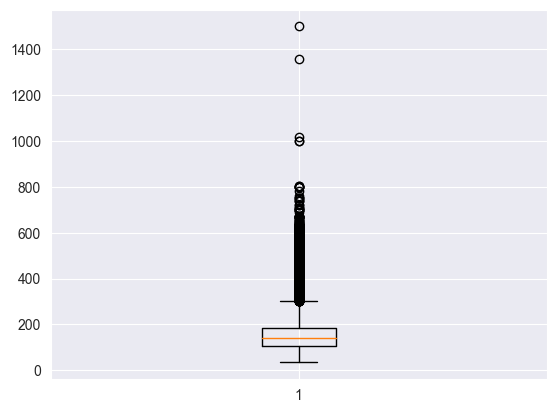

In [12]:
#Ящик с усами для максимальной мощности до удаления выбросов
plt.boxplot(x=cars_data['MaximumPower'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de216f6d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1de2172b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de216f6a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1de2172b7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de2172ba90>],
 'means': []}

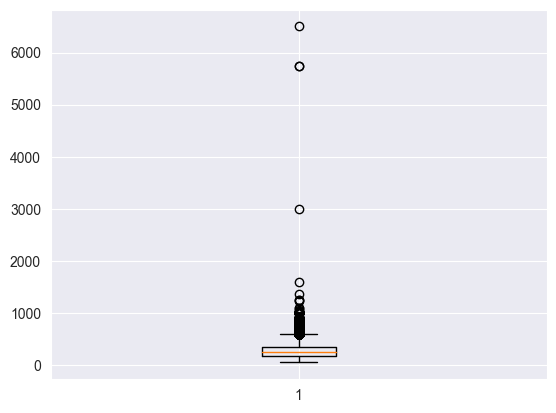

In [13]:
#Ящик с усами для максимального крутящего момента до удаления выбросов
plt.boxplot(x=cars_data['MaximumTorque'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de217cb700>,
 'caps': [<matplotlib.lines.Line2D at 0x1de217cbc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de217cb460>],
 'medians': [<matplotlib.lines.Line2D at 0x1de238581c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23858460>],
 'means': []}

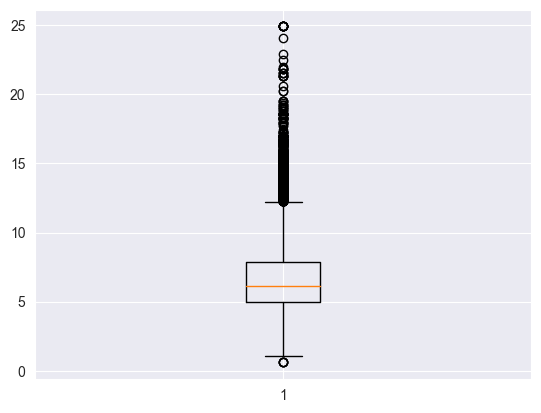

In [14]:
#Ящик с усами для расхода топлива до удаления выбросов
plt.boxplot(x=cars_data['FuelConsumption'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de217e3220>,
 'caps': [<matplotlib.lines.Line2D at 0x1de217d9580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de217eed60>],
 'medians': [<matplotlib.lines.Line2D at 0x1de238b0fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de238b9df0>],
 'means': []}

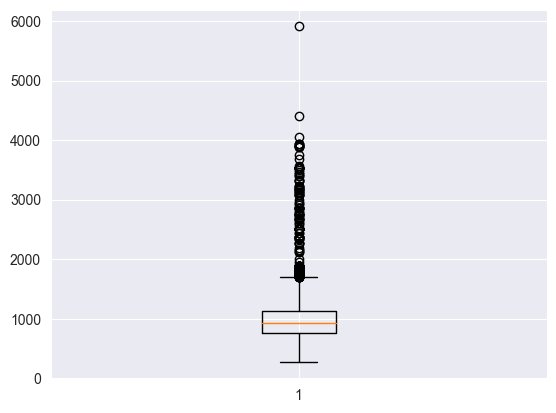

In [15]:
#Ящик с усами для километража на полном баке до удаления выбросов
plt.boxplot(x=cars_data['Range'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23a7a910>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23a7ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23a7a670>],
 'medians': [<matplotlib.lines.Line2D at 0x1de2391f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de2391f670>],
 'means': []}

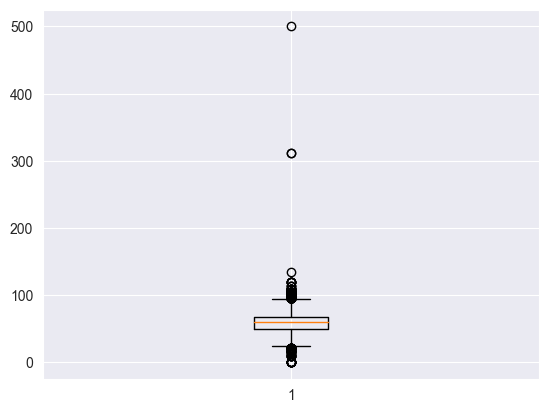

In [16]:
#Ящик с усами для вместительности топливного бака до удаления выбросов
plt.boxplot(x=cars_data['FuelTankCapacity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de2398e310>,
 'caps': [<matplotlib.lines.Line2D at 0x1de2398e850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de2398e070>],
 'medians': [<matplotlib.lines.Line2D at 0x1de2398ed90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de2399c070>],
 'means': []}

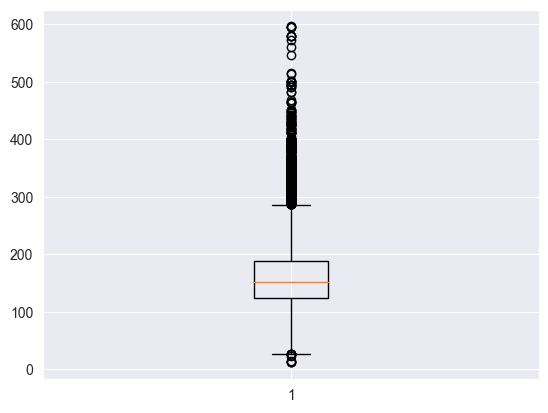

In [17]:
#Ящик с усами для выбросов углекислого газа до удаления выбросов
plt.boxplot(x=cars_data['CO2Emissions'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de239f0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23a01190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de239f0970>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23a016d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23a01970>],
 'means': []}

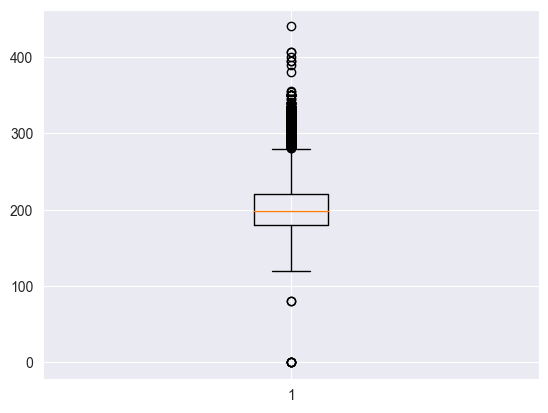

In [18]:
#Ящик с усами для максимальной скорости до удаления выбросов
plt.boxplot(x=cars_data['TopSpeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23a86eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23ab2340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23a86c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23ab2880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23ab2b20>],
 'means': []}

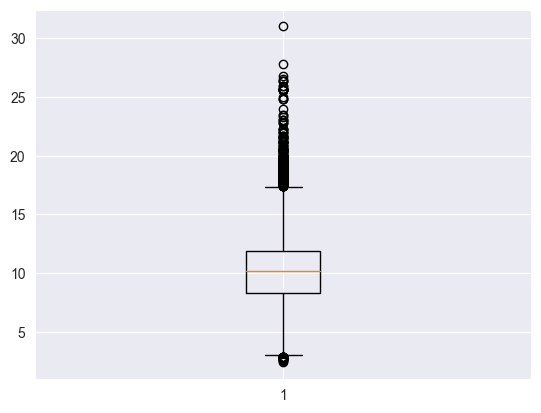

In [19]:
#Ящик с усами для ускорения 0-100 до удаления выбросов
plt.boxplot(x=cars_data['Acceleration'])

In [20]:
#Функция удаления выбросов по "Ящику с усами"
def detect_outliers(dataFrame,threshold):
    outlier = [] #Массив выбросов
    non_string_dataFrame = dataFrame.select_dtypes(exclude='string').columns
    for i in non_string_dataFrame:
        # Первый квартиль
        q1 = np.percentile(dataFrame[i],25)
        # Третий квартиль
        q3 = np.percentile(dataFrame[i],75)
        # Мера разброса, которая измеряет разницу между верхним и нижним квартилями
        iqr = q3 - q1
        # Шаг выброса, где threshold - пороговое значение
        outlier_step = iqr * threshold
        # Распознавание выбросов и их индексов
        outlier_list_col = dataFrame[(dataFrame[i] < q1 - outlier_step) | (dataFrame[i] > q3 + outlier_step)].index
        # Сохранение индексов
        outlier.extend(outlier_list_col)
    return outlier

In [21]:
#Удалениe выбросов по "Ящику с усами"
outliers = detect_outliers(cars_data, 1.5)
cars_data = cars_data.drop(cars_data.loc[outliers].index,axis=0)
cars_data

,CarName,EngineType,FuelType,MaximumPower,MaximumTorque,Drivetrain,FuelConsumption,Range,FuelTankCapacity,CO2Emissions,TopSpeed,Acceleration
0,Peugeot 207 1.6 HDi 90,Inline 4,Diesel,90,215,FWD,4.5,1111,50.0,120,182,11.5
1,Seat Ibiza 6L 1.2 12v,Inline 3,Petrol,69,112,FWD,6.0,750,45.0,144,170,14.2
2,Mercedes Benz SLK (R171) 280,V 6,Petrol,231,300,RWD,9.7,721,70.0,231,250,6.3
3,Volkswagen Golf Plus 1.6 FSI,Inline 4,Petrol,116,155,FWD,7.2,763,55.0,173,189,11.8
4,Mercedes Benz CLK (209) Coupe 200 Kompressor,Inline 4,Petrol,163,240,RWD,8.3,746,62.0,198,230,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...
28708,Opel Astra H Estate 1.9 CDTi 120HP Auto,Inline 4,Diesel,120,280,FWD,7.1,732,52.0,189,190,10.8
28709,Tesla Roadster Electric,Inline 4,Petrol,200,262,FWD,9.4,553,52.0,226,230,8.4
28710,Opel Astra H Estate 1.7 CDTi 110HP,Inline 4,Diesel,110,260,FWD,4.5,1155,52.0,119,188,12.3
28711,Vauxhall VX220 2.0i Turbo,Inline 4,Petrol,200,250,RWD,8.5,423,36.0,202,243,4.9


{'whiskers': [<matplotlib.lines.Line2D at 0x1de23b22550>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23b22a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23b222b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23b22fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23b312b0>],
 'means': []}

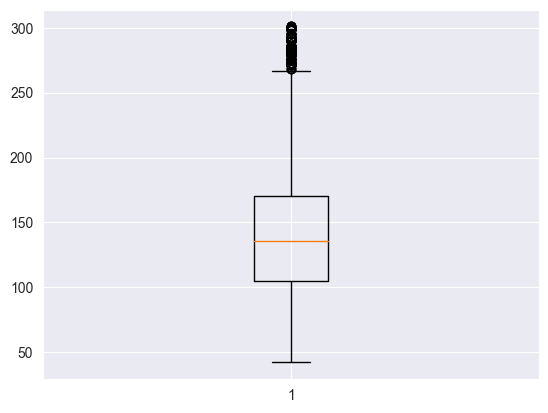

In [22]:
#Ящик с усами для максимальной мощности до удаления выбросов
plt.boxplot(x=cars_data['MaximumPower'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23b8e190>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23b8e6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23b79eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23b8eb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23b8ee20>],
 'means': []}

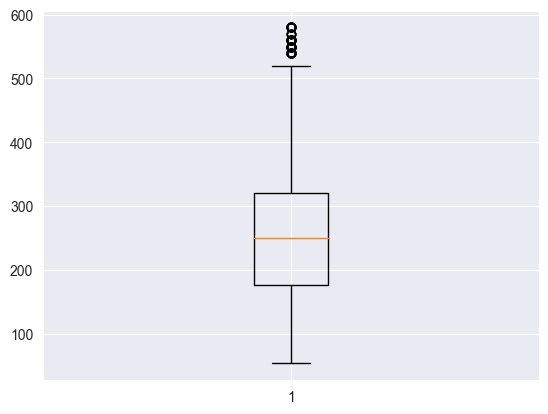

In [23]:
#Ящик с усами для максимального крутящего момента до удаления выбросов
plt.boxplot(x=cars_data['MaximumTorque'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23c3f310>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23c3f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23c3f070>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23c3fd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23c6c070>],
 'means': []}

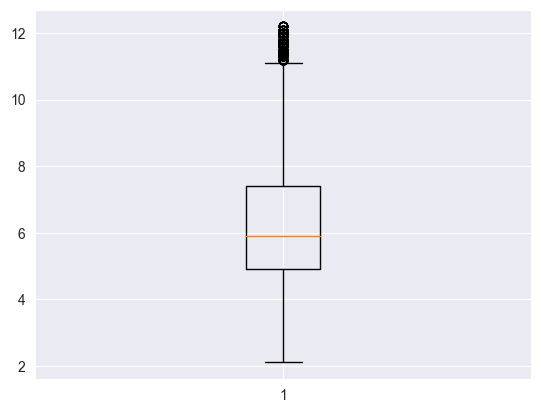

In [24]:
#Ящик с усами для расхода топлива до удаления выбросов
plt.boxplot(x=cars_data['FuelConsumption'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23df3cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23ca7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23df3a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23ca7790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23ca7a30>],
 'means': []}

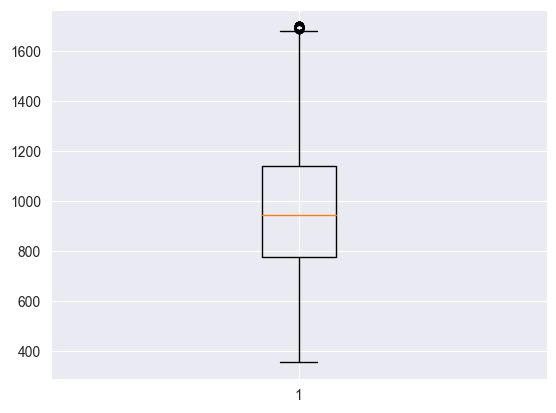

In [25]:
#Ящик с усами для километража на полном баке до удаления выбросов
plt.boxplot(x=cars_data['Range'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23cee910>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23ceee50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23cee670>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23d1e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23d1e670>],
 'means': []}

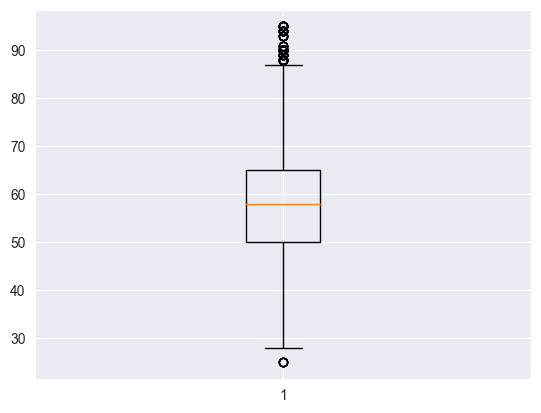

In [26]:
#Ящик с усами для километража на полном баке до удаления выбросов
plt.boxplot(x=cars_data['FuelTankCapacity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23d68d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23d7b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23d68a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23d7b7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23d7ba90>],
 'means': []}

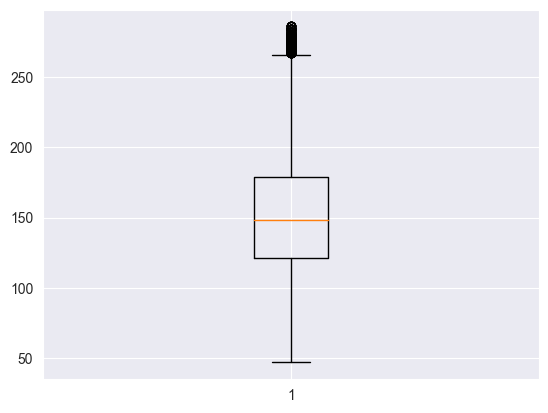

In [27]:
#Ящик с усами для выбросов углекислого газа до удаления выбросов
plt.boxplot(x=cars_data['CO2Emissions'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23e18430>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23e18850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23e18190>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23e18d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23e29070>],
 'means': []}

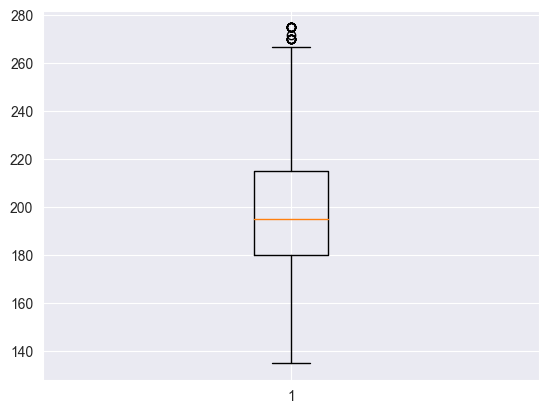

In [28]:
#Ящик с усами для максимальной скорости до удаления выбросов
plt.boxplot(x=cars_data['TopSpeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de23f95490>,
 'caps': [<matplotlib.lines.Line2D at 0x1de23e4a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de23e4a610>],
 'medians': [<matplotlib.lines.Line2D at 0x1de23e4ad00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de23e4afa0>],
 'means': []}

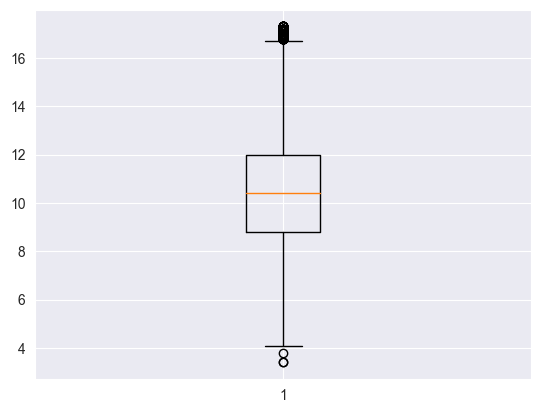

In [29]:
#Ящик с усами для ускорения 0-100 до удаления выбросов
plt.boxplot(x=cars_data['Acceleration'])

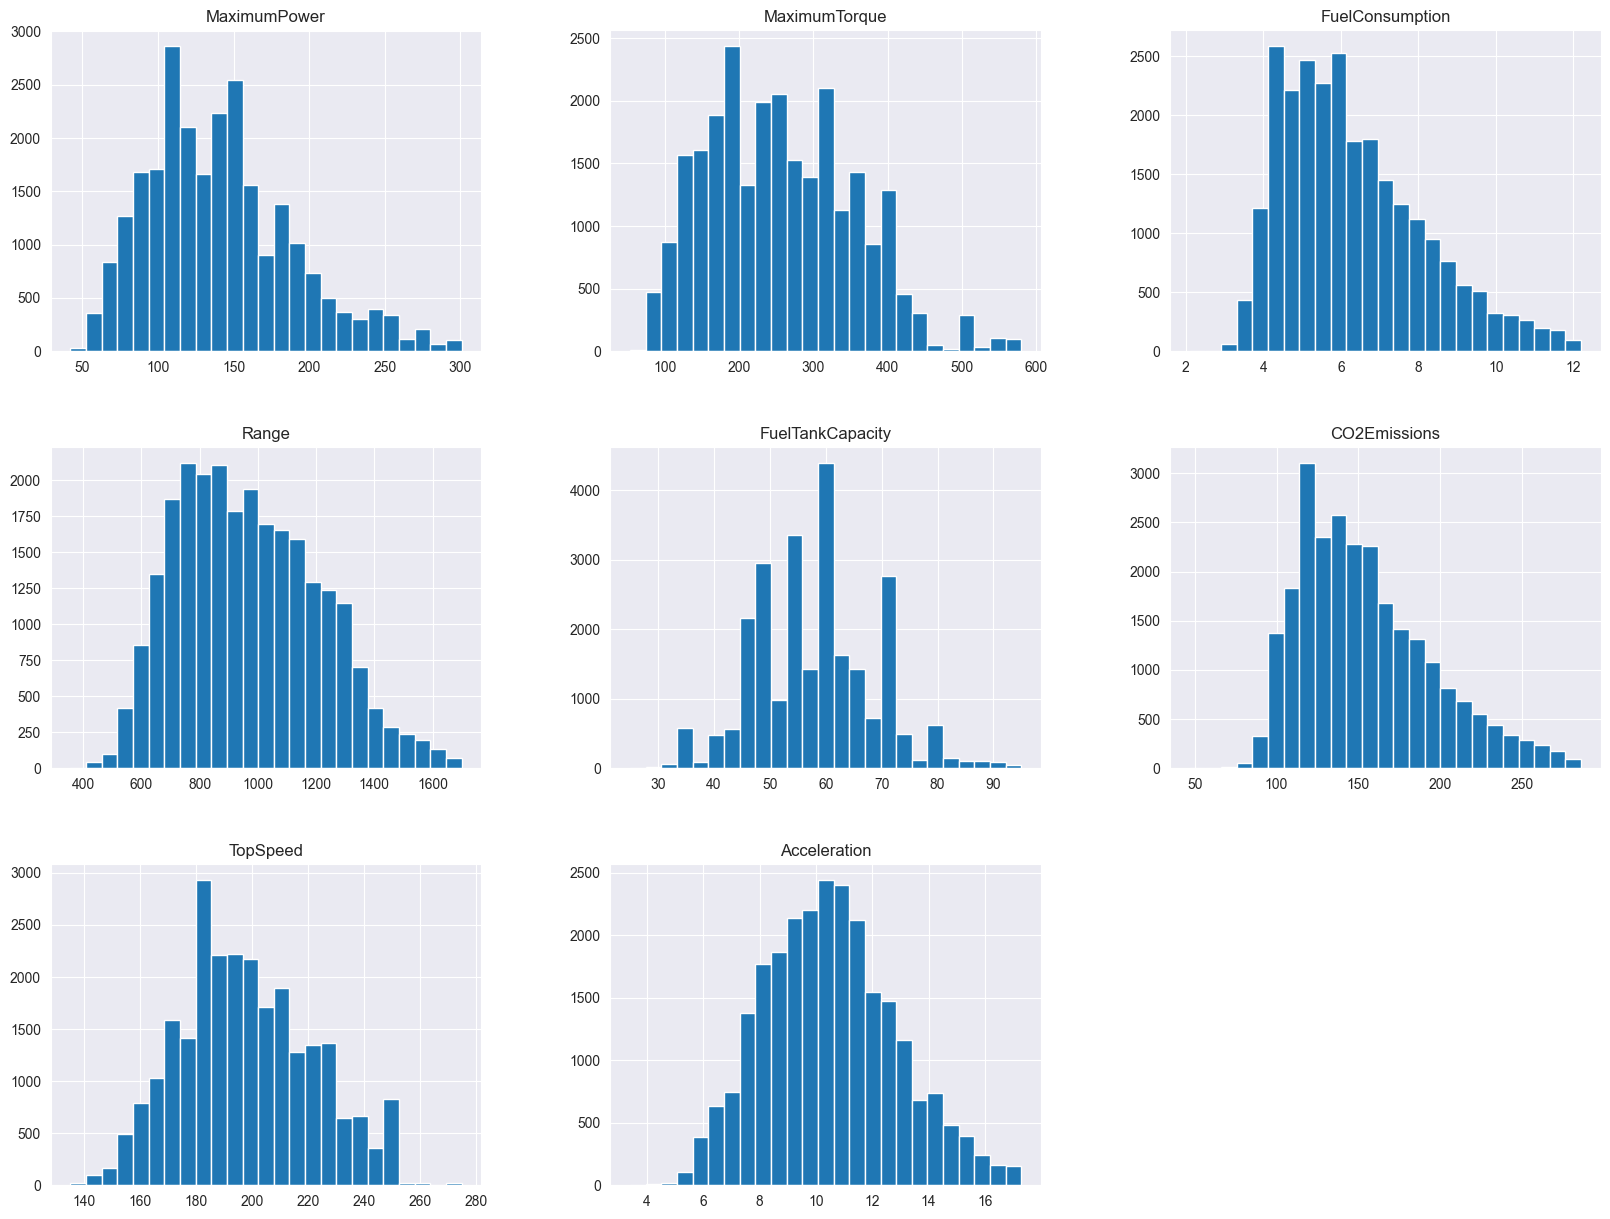

In [30]:
%matplotlib inline

cars_data.hist(bins=25, figsize=(20,15))
plt.show()

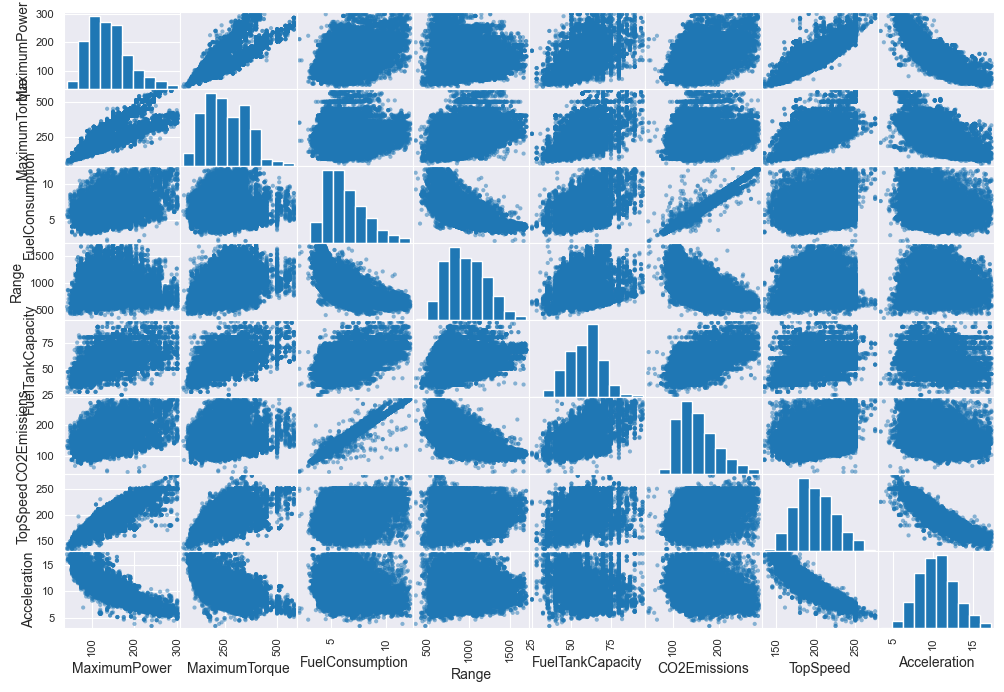

In [31]:
cols_to_drop = ["CarName", "EngineType", "FuelType", "Drivetrain"]
non_string_cars_data = cars_data.drop(columns=cols_to_drop)
pd.plotting.scatter_matrix(non_string_cars_data, figsize=(12, 8))
plt.show()

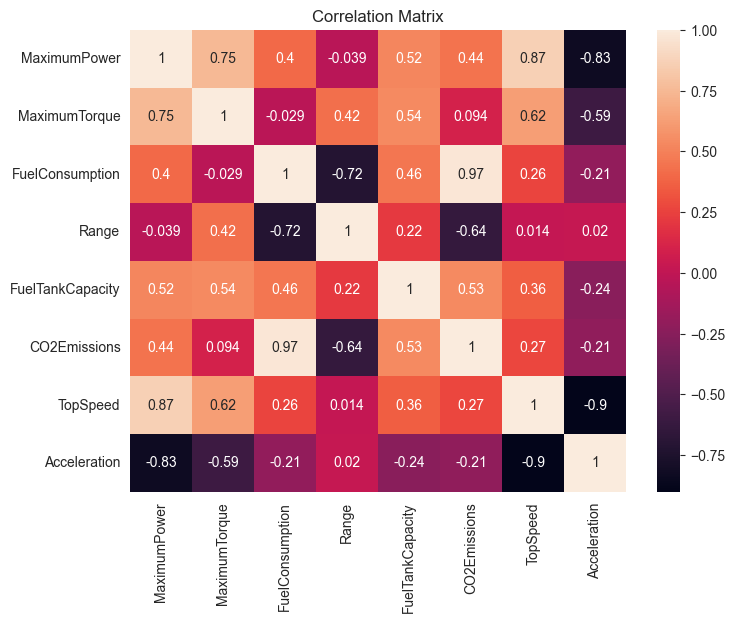

In [32]:
cols_to_drop = ["CarName", "EngineType", "FuelType", "Drivetrain"]
non_string_cars_data = cars_data.drop(columns=cols_to_drop)

plt.figure(figsize=(8,6))
sns.heatmap(non_string_cars_data.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
cars_data.to_csv(r'clean.csv', index= False )